# Run the whole deltas algorithm

In [30]:
%load_ext autoreload
%autoreload 2

import deltas
import numpy as np
from deltas.pipeline import data, classifier, evaluation
from deltas.model import downsample

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [31]:
binary = True
remove = []
remove = [2,3,4,5,6,7,8,9]
minority_id = [0]
split = 0.1
ratio = None
data_clf = data.get_real_dataset(
    'MNIST', scale=False, binary=binary, classes_remove=remove, minority_id=minority_id,
    split=split, ratio=ratio, equal_test=True)
# print(len(data_clf['data']['y']))
# print(sum(data_clf['data']['y']))
# import numpy as np
# print(np.unique(data_clf['data']['y']))
# deltas.plotting.plots.plot_classes(data_clf['data'], dim_reducer=data_clf['dim_reducer'])

12665 5923
MNIST: 11928
Number of attribues: 784
Classes total: 6005 - 5923

Classes train: 674 - 592
Classes test:  5331 - 5331


In [32]:
print(np.unique(data_clf['data']['y']))
print(np.unique(data_clf['data_test']['y']))

[0 1]
[0 1]


## Get Classifier

In [33]:
epochs = 5
classifiers_dict = classifier.get_classifier(
                      data_clf=data_clf,
                      model='MNIST',
                      binary=True,
                      epochs=epochs,
                      _plot=False)

data_clf['clf'] = classifiers_dict['Baseline']

for clf in ['Baseline', 'SMOTE']:
    print(clf, ':')
    classifiers_dict[clf].test(data_clf['data']['X'],
                            data_clf['data']['y'], data_s='train')
    classifiers_dict[clf].test(data_clf['data_test']['X'],
                            data_clf['data_test']['y'], data_s='test ')

Baseline :
train set: Accuracy: 0.9984202211690363
test  set: Accuracy: 0.9968111048583755
SMOTE :
train set: Accuracy: 0.9928909952606635
test  set: Accuracy: 0.9928718814481335


## Fit deltas

In [34]:
classifiers_dict['Baseline'].test(data_clf['data']['X'],
                           data_clf['data']['y'], data_s='train')

train set: Accuracy: 0.9984202211690363


Original Data
9.025915248972449e-05
plotting training data as data input


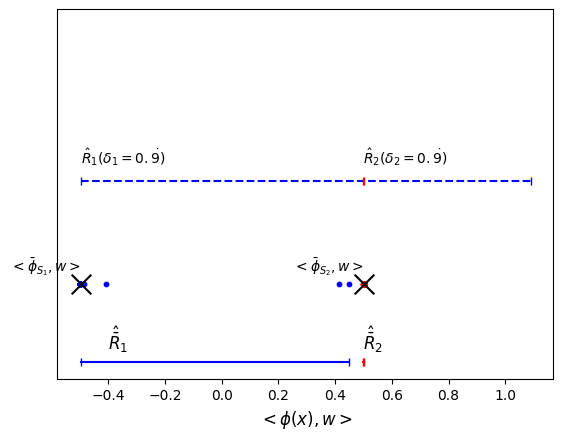

Trying random downsampling deltas (multiprocessing batches of 26):   0%|          | 0/24 [00:00<?, ?it/s]/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in scalar divide
  inside_exp = 0.5*(np.square(((B*np.sqrt(N2))/(factor*R2)) - 2))
/home/matt/projects/linear_confidence/deltas/utils/equations.py:145: RuntimeWarning: divide by zero encountered in 

Unable to find result with downsample, increase the max_trials


In [45]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = downsample.downsample_deltas(clf).fit(X, y, 
                                                     alpha=10,
                                                     _print=True, 
                                                     _plot=True,
                                                    #  method='supports-prop-update_mean',
                                                     method='supports-prop-update_mean-margin_only',
                                                     max_trials=1000,
                                                     parallel=True,
                                                     grid_search=False)

## Plot training data information

In [36]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data(data_clf['data'])
deltas_model.plot_data(data_clf['data_test'])

Not fit to any data yet, call 'fit(X, y)'  method first
Not fit to any data yet, call 'fit(X, y)'  method first


## Show parameters

In [37]:
deltas_model.print_params()

Not fit to any data yet, call 'fit(X, y)' or  method first


# Evaluation on test data

Not fit to any data yet, call 'fit(X, y)' or  method first
            Accuracy    G-Mean   ROC-AUC        F1
Method                                            
Baseline    0.996436  0.996435  0.996436  0.996439
SMOTE       0.983211  0.983081  0.983211  0.982938
BMR         0.996155  0.996154  0.996155  0.996150
Threshold   0.996155  0.996154  0.996155  0.996151
Our Method  0.996436  0.996435  0.996436  0.996439 


Baseline


/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


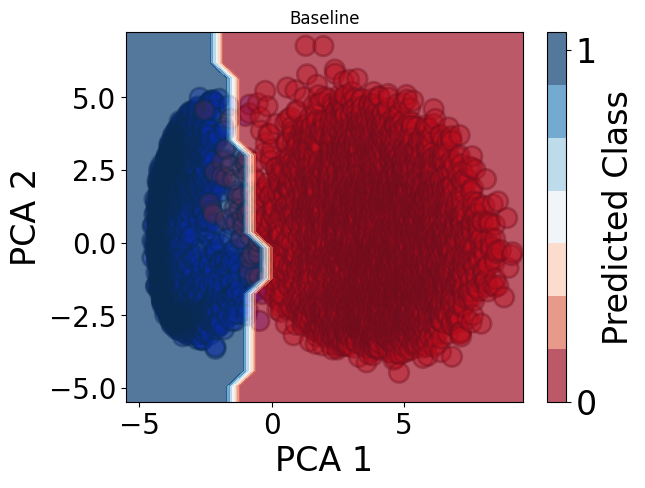

SMOTE


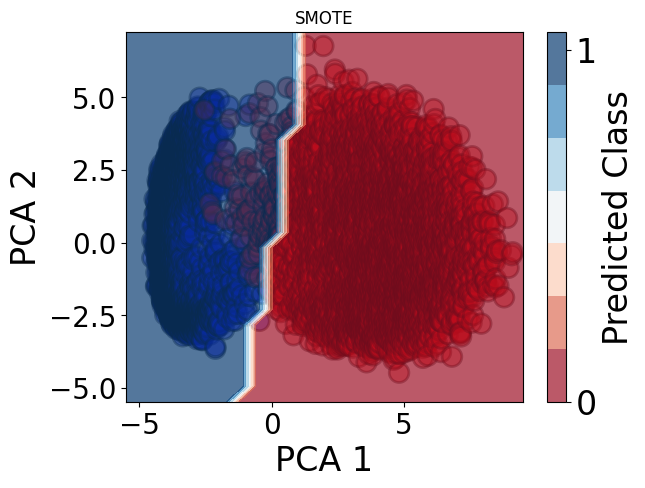

BMR


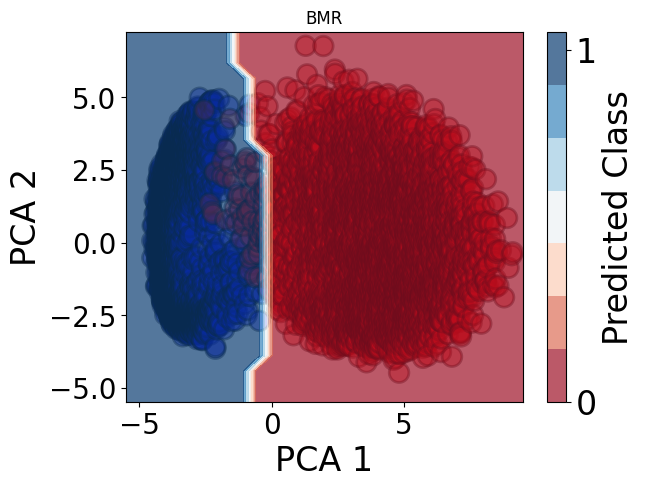

Threshold


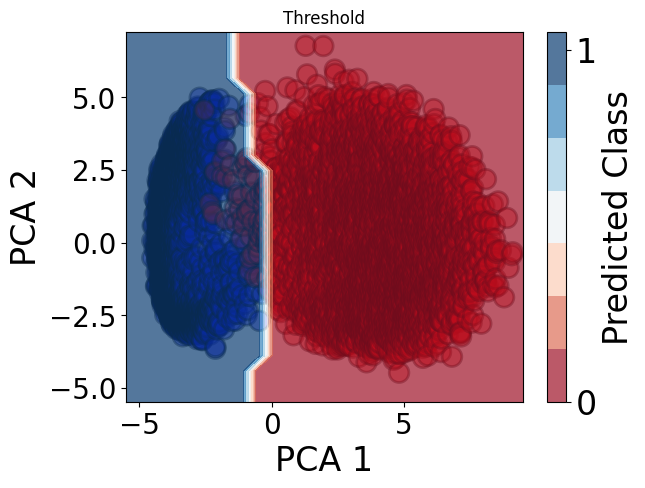

Our Method
Not fit to any data yet, call 'fit(X, y)' or  method first


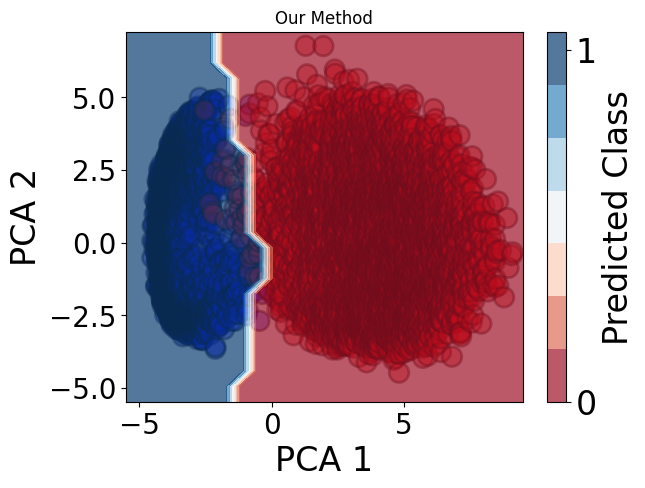

Giving bias from original classifier


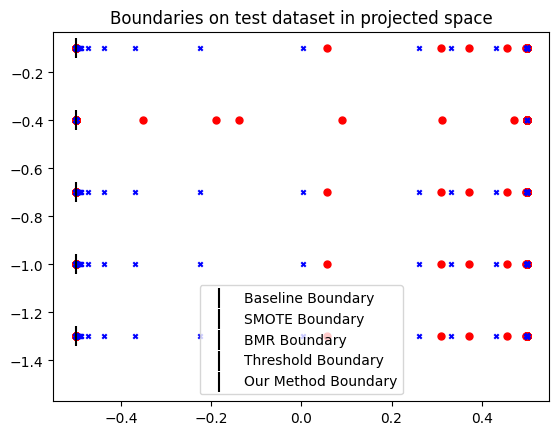

LATEX table format


\begin{tabular}{lrrrr}
 & Accuracy & G-Mean & ROC-AUC & F1 \\
Method &  &  &  &  \\
Baseline & 0.9964 & 0.9964 & 0.9964 & 0.9964 \\
SMOTE & 0.9832 & 0.9831 & 0.9832 & 0.9829 \\
BMR & 0.9962 & 0.9962 & 0.9962 & 0.9961 \\
Threshold & 0.9962 & 0.9962 & 0.9962 & 0.9962 \\
Our Method & 0.9964 & 0.9964 & 0.9964 & 0.9964 \\
\end{tabular}



,Accuracy,G-Mean,ROC-AUC,F1
Method,,,,
Baseline,0.996436,0.996435,0.996436,0.996439
SMOTE,0.983211,0.983081,0.983211,0.982938
BMR,0.996155,0.996154,0.996155,0.996150
Threshold,0.996155,0.996154,0.996155,0.996151
Our Method,0.996436,0.996435,0.996436,0.996439


In [29]:
classifiers_dict['Our Method'] = deltas_model
evaluation.eval_test(classifiers_dict, data_clf['data_test'], _print=True,
              _plot=True, dim_reducer=data_clf['dim_reducer'])